Here I test the code for generating cylinders from the triangles.

In [1]:
from context import bowman
import triangulation as trin
import sage.all
from sage.all import *

The following set of cells tests the cylinder direction code, as well as the functions that return the barycentric coordinates of the intersection points for particular constraints.

Completed triangulation.
The cylinders are:  [[0, 1], [2, 3, 4, 5], [6, 7]]


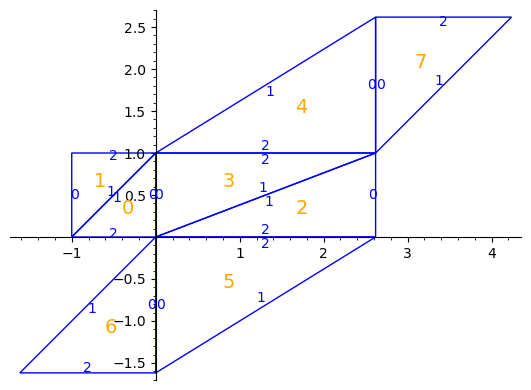

In [2]:
k = QuadraticField(5)
sqrt5 = k.gen()
phi = (1+sqrt5)/2
d = vector([0,1])
X = trin.Triangulation.mcmullen_s(phi)
Y, cyls = X.make_directional_triangulation(d)
print("The cylinders are: ", cyls)
Y.plot()

In [8]:
#return_intersections(self, triangle_id, constraints_list):
# mark_line(self, triangle_id, start_coords, end_coords, rgbcolor):
constraints = [[1, 2, -3/2], [-2, 3, -(1/2)]]
coords = Y.return_intersections(0, constraints)
print("The barycentric coordinates for the line intersections are: ", coords)

The barycentric coordinates for the line intersections are:  [[(1/2, 1/2, 0), (3/4, 0, 1/4)], [(1/2, 1/2, 0), (1/6, 0, 5/6)]]


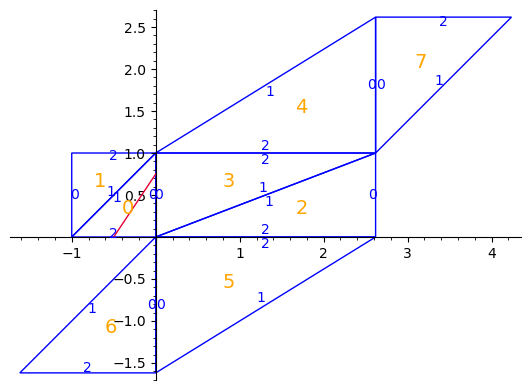

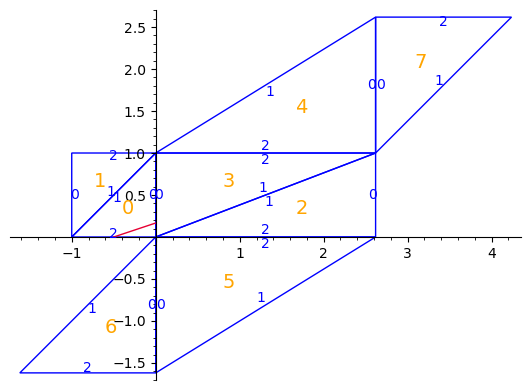

In [4]:
Y.mark_line(0, coords[0][0], coords[0][1], (0.9, 0.0, 0.2)).plot().show()
Y.mark_line(0, coords[1][0], coords[1][1], (0.9, 0.0, 0.2)).plot().show()

Test directional triangulation code.

Completed triangulation.
[[0, 1, 5, 4], [2, 3]]


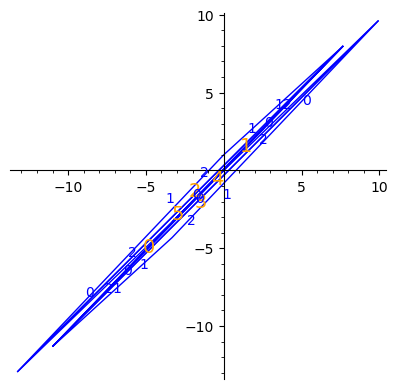

In [5]:
X = trin.Triangulation.ronen_l(44)
d = vector([1, 1])
Y, cyls = X.make_directional_triangulation(d)
print(cyls)
Y.plot()

Completed triangulation.
[[0, 1, 3, 2], [4, 5]]
True


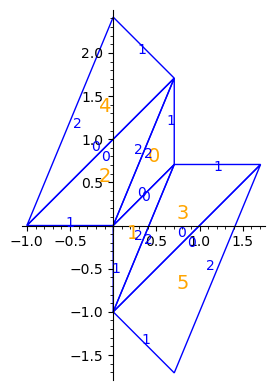

In [6]:
X = trin.Triangulation.regular_octagon()
k = QuadraticField(2)
sqrt2 = k.gen()
d = vector([0, 1])
d1=vector([1 / sqrt2, 1 / sqrt2])
d2 = vector([-1 -1 / sqrt2, -1 / sqrt2])
Y, cyls = X.make_directional_triangulation(d1)
print(cyls)
print(X.is_delaunay)
Y.plot()

Completed triangulation.
[[0, 5, 4, 2, 3], [1, 8, 9, 7, 6]]
True


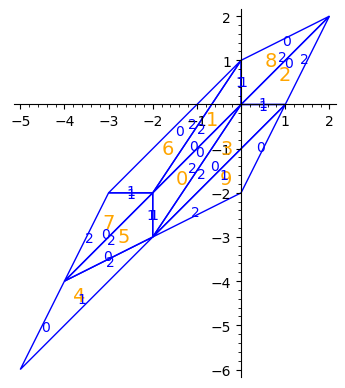

In [7]:
X = trin.Triangulation.mcmullen_l(2, 2)
d = vector([2, 2])
Y, cyls = X.make_directional_triangulation(d)
print(cyls)
print(X.is_delaunay)
Y.plot()